<a href="https://colab.research.google.com/github/pk210495/Melanoma-Detection-Assignment/blob/main/Melanoma_SkinCancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
#Unzipping the Datafile
!unzip "/content/gdrive/MyDrive/content/drive/CNN_assignment.zip" > /dev/null

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [ ]:
#Printing the counts of images in the train and test dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [ ]:
#Visualize one instance of all the class present in the dataset.

#image_dataset_from_directory() will return a tf.data.Dataset that contains batches of images in subdirectories
image_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

Found 2239 files belonging to 9 classes.


### Create a dataset

Define some parameters for the loader:

In [ ]:
#predefined parameters for the train and test datasets
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size, image_size=(img_height, img_width), label_mode='categorical', seed=123,
                                                               subset='training',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size, image_size=(img_height, img_width), label_mode='categorical', seed=123,
                                                               subset='validation',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

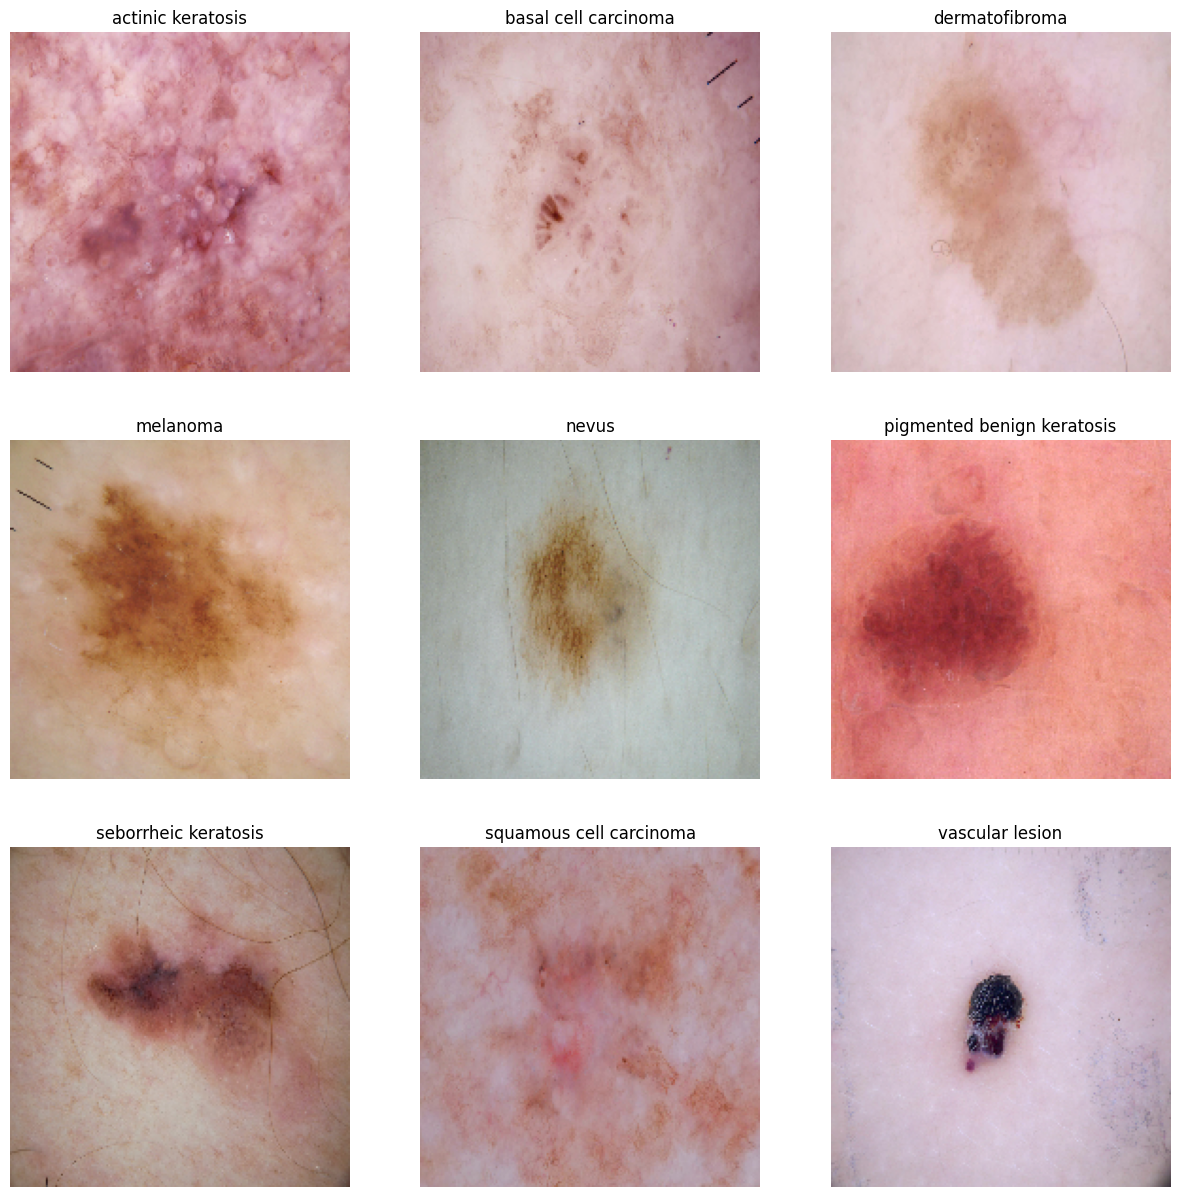

In [ ]:
#Dictionary to store the path of image as per the class
files_path = {}

for c in class_names:
    files_path[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path = files_path[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(tf.keras.preprocessing.image.load_img(path[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
# Creating the CNN model
model = Sequential()

#Rescaling layer
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))

#First Convolution Layer
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convolution Layer
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convolution Layer
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Fourth Convolution Layer
model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropping out 50% of the connections here
model.add(layers.Dropout(0.5))

#Flattening the feature maps
model.add(layers.Flatten())

#Adding a Denser layer
model.add(layers.Dense(256,activation='relu'))

#Dropping out 25% of the connections
model.add(layers.Dropout(0.25))

#Adding the softmax layer for classification
model.add(layers.Dense(len(class_names), activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Justification for choosing an optimizer

While stochastic gradient descent ('sgd') is known to generalise better than adaptive moment estimation ('adam'), we have opted to use adam due to time constraints as it has a tendency to converge faster. The project pipeline states that the number of epochs to use be 20, so this makes sense considering the specific circumstances of this project.
However, trying various optimizers as an hyperparameter would be an ideal choice!

### Justification for choosing loss function

This loss is used for multi-class classification tasks. It's suitable when you have a small number of classes.

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 84, 84, 64)        36928     
                                                        

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
  )

Epoch 1/20
56/56 [==============================] - 47s 261ms/step - loss: 2.0645 - accuracy: 0.1948 - val_loss: 2.0223 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 10s 171ms/step - loss: 1.9833 - accuracy: 0.2344 - val_loss: 1.9534 - val_accuracy: 0.2908
Epoch 3/20
56/56 [==============================] - 10s 171ms/step - loss: 1.7874 - accuracy: 0.3482 - val_loss: 1.6383 - val_accuracy: 0.4407
Epoch 4/20
56/56 [==============================] - 10s 172ms/step - loss: 1.7129 - accuracy: 0.3873 - val_loss: 1.8624 - val_accuracy: 0.2975
Epoch 5/20
56/56 [==============================] - 10s 174ms/step - loss: 1.7398 - accuracy: 0.3594 - val_loss: 1.6055 - val_accuracy: 0.4295
Epoch 6/20
56/56 [==============================] - 10s 177ms/step - loss: 1.6399 - accuracy: 0.4035 - val_loss: 1.5523 - val_accuracy: 0.4519
Epoch 7/20
56/56 [==============================] - 10s 175ms/step - loss: 1.5864 - accuracy: 0.4286 - val_loss: 1.5126 - val_accuracy: 0.4676

### Visualizing training results

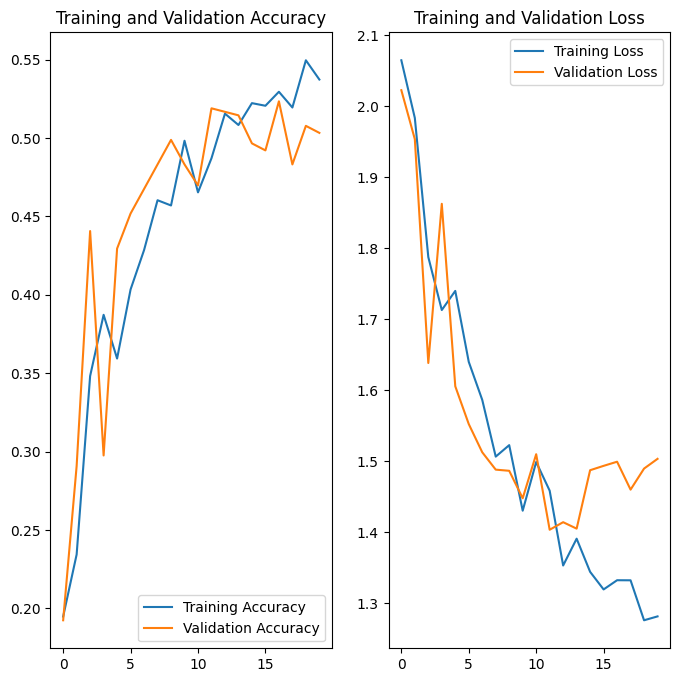

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

- Very low training and validation accuracy
- Model can be fine-tuned to improve on accuracy

- Also, it's too early to comment on underfit/overfit.

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.5),
    layers.RandomContrast(0.5),
    layers.RandomBrightness(0.3),
    layers.RandomBrightness(0.3)
])

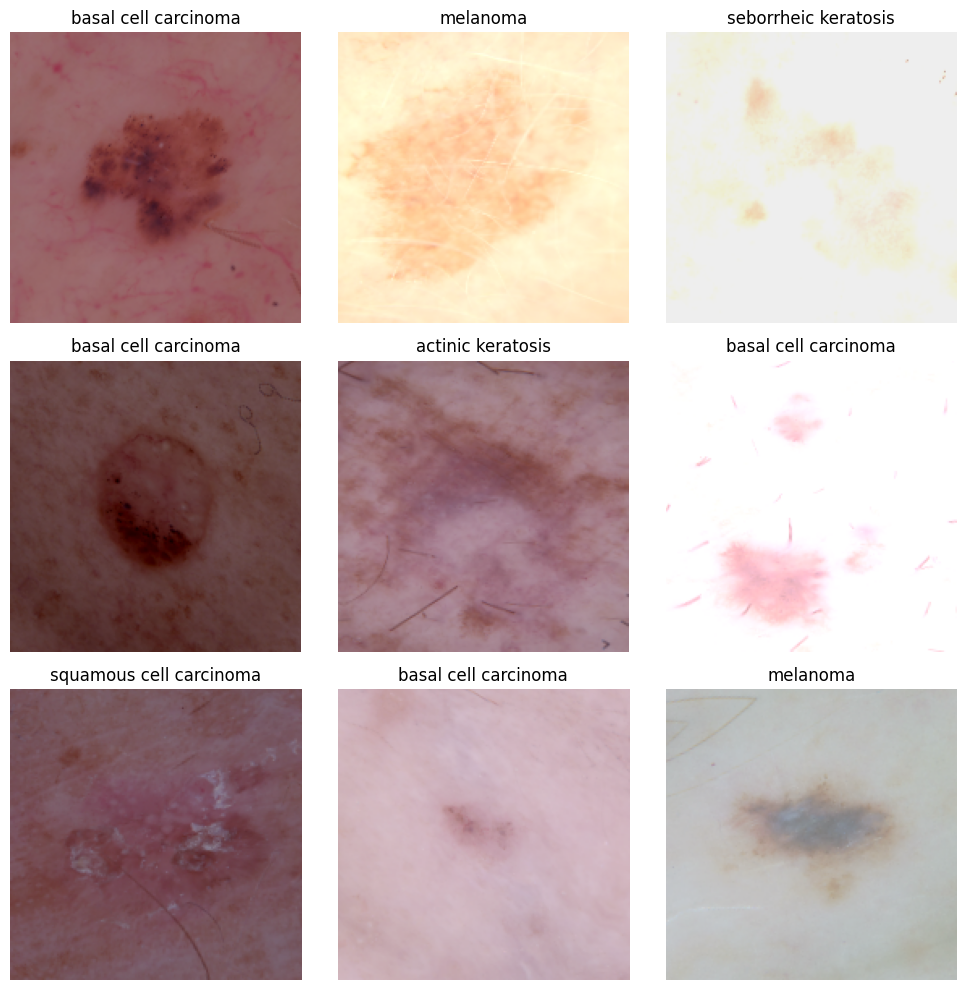

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
import matplotlib.pyplot as plt
import numpy as np

class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    augmented_images = data_augmentation(images)  # Apply data augmentation

    for i in range(9):
        augmented_image = augmented_images[i].numpy().astype("uint8")
        label_index = np.argmax(labels[i].numpy())  # Get the index of the highest value in the label tensor

        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image)
        plt.title(class_names[label_index])
        plt.axis("off")

plt.tight_layout()
plt.show()


### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

# Creating the CNN model
model = Sequential()

#Rescaling layer
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))

#First Convolution Layer
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2,2)))


#Second Convolution Layer
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2,2)))


#Third Convolution Layer
model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2,2)))


#Fourth Convolution Layer
model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2,2)))


#Fifth Convolution Layer
model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2,2)))


#Flattening the feature maps
model.add(layers.Flatten())

#Adding a Denser layer
model.add(layers.Dense(512,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
#Adding the softmax layer for classification
model.add(layers.Dense(len(class_names), activation='softmax'))


### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
## Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 128)    512       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 180, 180, 128)     0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 128)      

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
  )

Epoch 1/20
56/56 [==============================] - 27s 358ms/step - loss: 11.9141 - accuracy: 0.3711 - val_loss: 10.5696 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 18s 314ms/step - loss: 6.5606 - accuracy: 0.5033 - val_loss: 7.4679 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 18s 318ms/step - loss: 4.5883 - accuracy: 0.5368 - val_loss: 6.4353 - val_accuracy: 0.2662
Epoch 4/20
56/56 [==============================] - 18s 314ms/step - loss: 3.4993 - accuracy: 0.5720 - val_loss: 7.9431 - val_accuracy: 0.1633
Epoch 5/20
56/56 [==============================] - 18s 317ms/step - loss: 2.9655 - accuracy: 0.5887 - val_loss: 6.4331 - val_accuracy: 0.1946
Epoch 6/20
56/56 [==============================] - 18s 317ms/step - loss: 2.5921 - accuracy: 0.6032 - val_loss: 4.8255 - val_accuracy: 0.2081
Epoch 7/20
56/56 [==============================] - 18s 315ms/step - loss: 2.2063 - accuracy: 0.6596 - val_loss: 4.9962 - val_accuracy: 0.25

### Visualizing the results

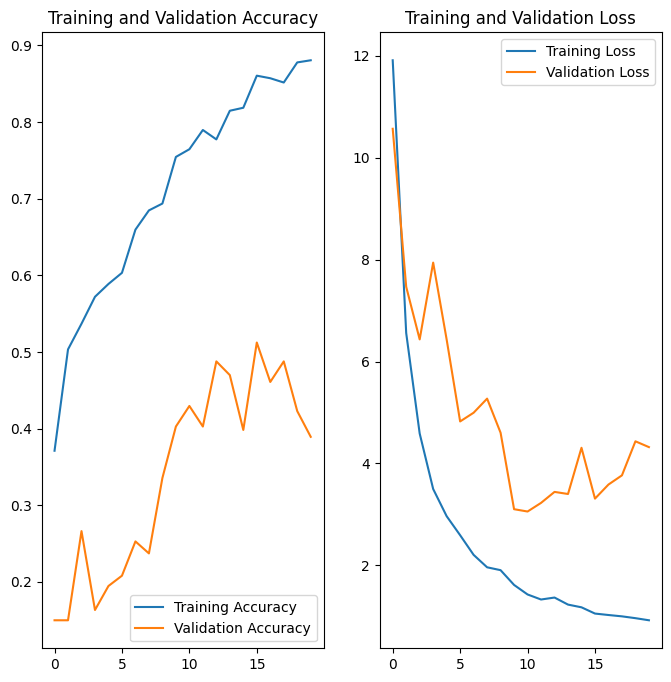

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

####  There is some improvement in the train accuracy, but the model has huge difference between train and val accuracy, clearly indicating that it tends to overfit!

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
#Viewing Class Imbalance
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,vascular lesion,139
1,nevus,357
2,melanoma,438
3,pigmented benign keratosis,462
4,basal cell carcinoma,376
5,squamous cell carcinoma,181
6,actinic keratosis,114
7,seborrheic keratosis,77
8,dermatofibroma,95


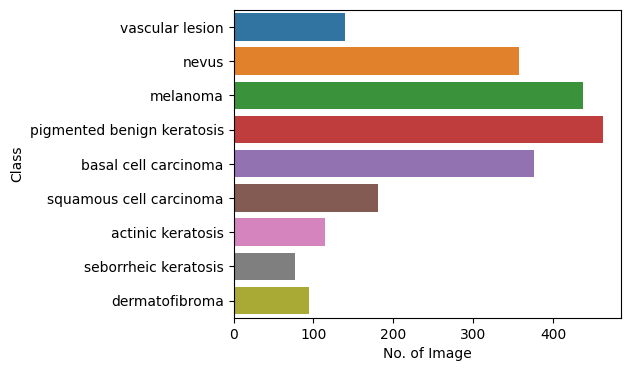

In [ ]:
#Visualizing Data Imbalance
import seaborn as sns
plt.figure(figsize=(5,4))
sns.barplot(x='No. of Image', y='Class', data=df, label='Class')
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Seborrheic keratosis has the least number of samples i.e 77

#### - Which classes dominate the data in terms proportionate number of samples?
#### - Pigmented benign keratosis (462 samples), melanoma (438) basal cell carcinoma (376), and nevus (357) are the category with the most samples. The groups "melanoma" and "pigmented benign keratosis" clearly predominate the data.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + '/' + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79615D06E770>: 100%|██████████| 500/500 [00:19<00:00, 26.04 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79615CCF3EE0>: 100%|██████████| 500/500 [00:22<00:00, 22.15 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79615CCDFA00>: 100%|██████████| 500/500 [00:21<00:00, 23.45 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79615CCF1F30>: 100%|██████████| 500/500 [01:33<00:00,  5.35 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79615CB689A0>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79615CB68730>: 100%|██████████| 500/500 [00:15<00:00, 31.99 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7961F0141240>: 100%|██████████| 500/500 [00:41<00:00, 11.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7961F01411B0>: 100%|██████████| 500/500 [00:15<00:00, 32.28 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79615CE70AC0>: 100%|██████████| 500/500 [00:16<00:00, 31.01 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
import os
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train,'*','output', '*.jpg'))]
l = pd.Series(lesion_list_new)
l.value_counts()

vascular lesion               500
nevus                         500
melanoma                      500
pigmented benign keratosis    500
basal cell carcinoma          500
squamous cell carcinoma       500
actinic keratosis             500
seborrheic keratosis          500
dermatofibroma                500
dtype: int64

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

vascular lesion               500
nevus                         500
melanoma                      500
pigmented benign keratosis    500
basal cell carcinoma          500
squamous cell carcinoma       500
actinic keratosis             500
seborrheic keratosis          500
dermatofibroma                500
Name: Label, dtype: int64


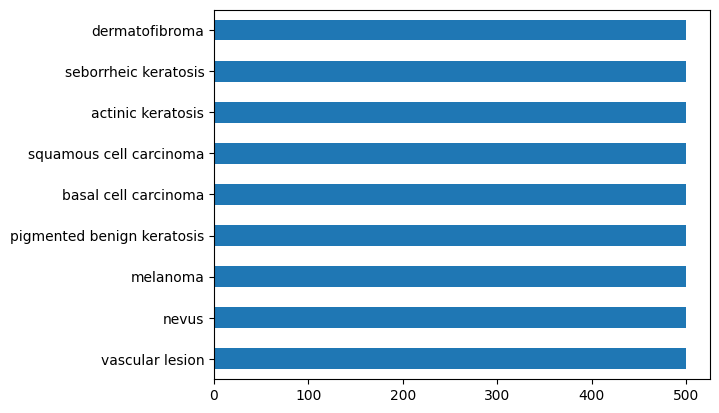

In [ ]:
print(df2['Label'].value_counts())
df2['Label'].value_counts().plot.barh()
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## Final Model
num_classes = 9

model3 = tf.keras.Sequential([
  #Input Layer
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  #First Convolution Layer
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.025),
  tf.keras.layers.MaxPooling2D(),
  #Second Convolution Layer
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.025),
  tf.keras.layers.MaxPooling2D(),
  #Third Convolution Layer
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.025),
  tf.keras.layers.MaxPooling2D(),
  #Fourth Convolution Layer
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.025),
  tf.keras.layers.MaxPooling2D(),
  #Flattening the feature maps
  tf.keras.layers.Flatten(),
  #Adding a Densely Connected Layer
  tf.keras.layers.Dense(256, activation='relu'),
  #Softmax Function for Classification
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
#Compiling the model
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Justification for choosing optimizer

While stochastic gradient descent ('sgd') is known to generalise better than adaptive moment estimation ('adam'), we have opted to use adam due to time constraints as it has a tendency to converge faster. The project pipeline states that the number of epochs to use be 30, so this makes sense considering the specific circumstances of this project.
However, using an ensemble approach to find the best optimizer may be the ideal choice!

#### Justification for choosing loss function

If your model outputs logits and your labels are integer indices, use SparseCategoricalCrossentropy(from_logits=True). If your model outputs probabilities (after a softmax activation) and your labels are one-hot encoded, use CategoricalCrossentropy().


#### **Todo:**  Train your model

In [ ]:
#Fitting the model
epochs = 30
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 40s 212ms/step - loss: 1.9322 - accuracy: 0.4266 - val_loss: 4.5071 - val_accuracy: 0.1381
Epoch 2/30
169/169 [==============================] - 36s 207ms/step - loss: 1.1513 - accuracy: 0.5959 - val_loss: 3.6454 - val_accuracy: 0.1700
Epoch 3/30
169/169 [==============================] - 39s 227ms/step - loss: 0.8443 - accuracy: 0.6962 - val_loss: 2.4671 - val_accuracy: 0.3964
Epoch 4/30
169/169 [==============================] - 34s 197ms/step - loss: 0.5905 - accuracy: 0.7851 - val_loss: 2.1195 - val_accuracy: 0.4388
Epoch 5/30
169/169 [==============================] - 34s 196ms/step - loss: 0.4768 - accuracy: 0.8249 - val_loss: 1.0289 - val_accuracy: 0.6756
Epoch 6/30
169/169 [==============================] - 36s 203ms/step - loss: 0.3915 - accuracy: 0.8529 - val_loss: 0.9332 - val_accuracy: 0.7179
Epoch 7/30
169/169 [==============================] - 38s 219ms/step - loss: 0.3036 - accuracy: 0.8908 - val_loss: 5.8005 - val_ac

#### **Todo:**  Visualize the model results

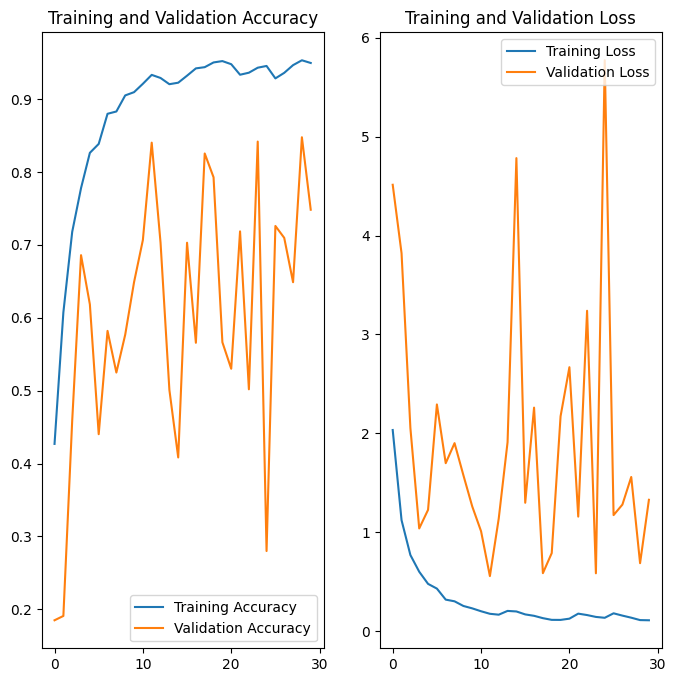

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



With training accuracy of 95 percent at 30 iterations and validation accuracy of 82 percent, the results with dataset augmentation significantly outperformed those from earlier models. It is advised to rerun the training with a lowering learning rate in light of the significant variations in the validation loss.